# Kelime Vektörleri Nedir?

Kelime vektörleri, kelimeleri sürekli sayısal vektörler olarak temsil eder. Bu vektörler kelimeler arasındaki anlamsal ilişkileri yakalamak için kullanılır.

Örneğin, "kral" ve "kraliçe" kelimeleri benzer vektörlere sahip olabilir çünkü semantik olarak ilişkilidirler. 
Kelime vektörleri, doğal dil işlemede yaygın olarak kullanılır ve metinlerin daha verimli işlenmesini sağlar.

# Word2Vec

Word2Vec, Google tarafından geliştirilen ve kelimeleri vektörler halinde temsil eden bir modeldir.

İki temel yaklaşımı vardır:
- **CBOW (Continuous Bag of Words)**: Verilen bir bağlamdan yola çıkarak hedef kelimeyi tahmin etmeye çalışır.
- **Skip-Gram**: Verilen bir kelimeden yola çıkarak bağlamdaki diğer kelimeleri tahmin etmeye çalışır.

Word2Vec büyük veri kümelerinde etkili bir şekilde eğitildiğinde kelimeler arasındaki anlamsal benzerlikleri öğrenebilir ve analoji testlerinde başarılı sonuçlar verebilir.

# GloVe (Global Vectors for Word Representation)

GloVe Stanford Üniversitesi tarafından geliştirilmiş bir kelime vektörü modelidir. 

Eş-oluşum matrisi üzerine kurulu olan GloVe, kelimelerin metin içerisinde ne sıklıkta bir arada bulunduklarına dayalı olarak vektör temsilleri oluşturur.

Bu model kelimelerin daha global bağlamda nasıl ilişkilendirileceğini öğrenir ve genellikle Word2Vec'e göre daha genel ilişkiler yakalayabilir.

# FastText
FastText, Facebook tarafından geliştirilmiş bir modeldir ve Word2Vec'e benzer şekilde çalışır, ancak alt kelime bilgisi kullanır.

FastText, kelimeleri n-gramlar (karakter seviyesinde) şeklinde temsil ederek nadir ve uzun kelimeler için daha iyi temsiller sağlar.

Bu özellikle zengin morfolojiye sahip dillerde önemli bir avantajdır ve kelimelerin iç yapılarından faydalanarak daha kapsamlı vektörler oluşturur.

Word2Vec Uygulaması

In [1]:
# Gerekli kütüphaneleri yükleyelim
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
import nltk

# NLTK verilerini indiriyoruz (ilk kullanımda gerekli)
nltk.download('punkt')
nltk.download('gutenberg')

# Gutenberg veri setinden bir metin örneği alalım
corpus = gutenberg.raw('austen-emma.txt')

# Metni tokenize edelim
tokenized_text = [word_tokenize(sentence.lower()) for sentence in corpus.split('\n') if sentence]

# İlk birkaç cümleyi görelim
print(tokenized_text[:5])

# CBOW modelini eğitelim
cbow_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, sg=0, epochs=10)

[nltk_data] Downloading package punkt to /home/oz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /home/oz/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


[['[', 'emma', 'by', 'jane', 'austen', '1816', ']'], ['volume', 'i'], ['chapter', 'i'], ['emma', 'woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home'], ['and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings']]


In [3]:
# Örnek bir kelimenin vektörünü inceleyelim
kelime_vektoru = cbow_model.wv['emma']  # 'emma' kelimesinin vektörü
print(kelime_vektoru)

# Benzer kelimeleri bulalım
benzer_kelimeler = cbow_model.wv.most_similar('human', topn=5)
print(benzer_kelimeler)

[ 0.818748    0.5899234  -0.64771366 -0.04100614  0.10396647 -0.75807804
 -0.04451495  0.8762559   0.9698591  -0.47520775 -0.30822644 -0.66120636
 -0.2854574   0.86950034  0.92611766  0.00250605  0.14357165  0.5666714
  0.37375733 -1.1016698   0.42031765  0.09195323  0.3083704  -0.27786493
  0.24961738  1.0577741  -0.5126266  -0.13306253  0.05079819  0.17929724
  0.6357652  -0.06558165  1.5132914  -0.3322564  -0.34375995  1.0984765
  0.63849604  0.2952555  -0.60757625  0.14542294 -0.716688    0.2999094
 -0.4554097   0.19618872  0.0824668  -0.5393717  -0.6018247  -0.28470525
  1.0294763   0.2289825  -0.28561345 -0.08324041  0.17068987 -0.7233929
  0.29079375  0.01885798  0.19325256  0.44119376  0.9761218   0.80201286
 -0.01388059  0.08721133  0.40544468  0.72885007 -0.07322339  0.4412459
 -0.04067072 -0.05134872 -0.15881044  0.4855038  -0.23607977  0.02829381
 -0.9859663   0.1595452   0.5385338   0.49420643  0.43031746  0.36705455
  0.03383632  0.3386196  -0.46896675 -0.10605266 -0.1497

Şimdi de eğitim için kullanılacak metni bir dosyadan okuyalım

In [4]:
# Gerekli kütüphaneleri yükleyelim
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Dosyadan metni okuyalım
with open('dosyalar//odtu_derlemi.txt', 'r', encoding='utf-8') as file:
    corpus = file.read()

# Metni tokenize edip küçük harfe çevirelim
tokenized_text = [word_tokenize(sentence.lower()) for sentence in corpus.split('\n') if sentence]

# İlk birkaç cümleyi görelim
print(tokenized_text[:5])

# CBOW modelini eğitelim
cbow_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, sg=0, epochs=10)

[['koca', 'bir', 'duvar', 'taşıyordun', 'yüreğinde', 'kimsenin', 'aşamayacağı', ',', 'aşmaya', 'cesaret', 'bile', 'edemeyeceği', '.'], ['dışa', 'karşı', 'güçlüydü', ',', 'ama', 'içe', ',', 'kendi', 'yüreğine', 'yıkılmak', 'üzereydi', '.'], ['anılarla', 'örülmüş', ',', 'acılarla', 'harçlanmış', 'bu', 'duvara', 'tırmanmak', ',', 'onu', 'aşabilmenin', 'ilk', 'şartıydı', '.'], ['vazgeçmek', 'kolaydı', ',', 'ertelemek', 'de', '.'], ['ama', 'tırmanmaya', 'başlandı', 'mı', 'bitirilmeli', '!']]


In [8]:
# Örnek bir kelimenin vektörünü inceleyelim
kelime_vektoru = cbow_model.wv['deniz']
#print(kelime_vektoru)

# Benzer kelimeleri bulalım
benzer_kelimeler = cbow_model.wv.most_similar('rahmetli', topn=50)
print(benzer_kelimeler)

[("efendi'nin", 0.8541117906570435), ('ayşe', 0.8516954779624939), ('güngör', 0.8449154496192932), ('bekir', 0.8415613770484924), ('kahveci', 0.8366692066192627), ('ahmed', 0.8328102827072144), ('hanım', 0.8296796679496765), ('kenan', 0.8270021080970764), ('niyazi', 0.8242082595825195), ('yağmurdereli', 0.8217030763626099), ('amca', 0.8202754259109497), ('beye', 0.818920910358429), ('şemsî', 0.8177227973937988), ('ağabey', 0.8172321915626526), ('sevim', 0.8168102502822876), ('ertan', 0.8152762055397034), ('muazzez', 0.8150972723960876), ('mithat', 0.8149206042289734), ('şenay', 0.8144675493240356), ('rıza', 0.8126181364059448), ('muzaffer', 0.8125320672988892), ('münir', 0.8114299178123474), ('gencebay', 0.8110565543174744), ('naci', 0.8110527992248535), ('dostum', 0.8106493949890137), ('karısı', 0.8102031946182251), ('paşa', 0.8101155757904053), ('sezen', 0.8094546794891357), ('fazıl', 0.8085280060768127), ('hikmet', 0.8076152801513672), ('salvador', 0.8065292239189148), ("ali'nin", 0

Şimdi de aynı metinle skipgram modeli eğitelim (sg parametresinin 1 olarak değiştiğine dikkat edin)

In [9]:
# SkipGram modelini eğitelim
skipgram_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, sg=1, epochs=10)

[('dağlık', 0.6101021766662598), ('mahsulleri', 0.5743685364723206), ('tabanında', 0.5678184628486633), ('gezmiş', 0.5584552884101868), ('otobüsleri', 0.5581162571907043)]


In [15]:
# Benzer kelimeleri bulalım
benzer_kelimeler = skipgram_model.wv.most_similar('git', topn=50)
print(benzer_kelimeler)

[('kalk', 0.8361334204673767), ('otur', 0.8333492279052734), ('i̇stersen', 0.831436812877655), ('uşağum', 0.8274722099304199), ('simdi', 0.8269408941268921), ('uyu', 0.8243774771690369), ('giyin', 0.8222067952156067), ('tövbe', 0.8207753896713257), ('istersen', 0.8202676177024841), ('habule', 0.8186061382293701), ('şuraya', 0.8185847401618958), ('gavur', 0.8166036009788513), ('üzülme', 0.8140789270401001), ('koşun', 0.8123148083686829), ('devetabanı', 0.8111951947212219), ('buyrun', 0.8075176477432251), ('bakayım', 0.8053044676780701), ('yürü', 0.8047415614128113), ('boğ', 0.8043554425239563), ('kızma', 0.8029355406761169), ("allah'un", 0.8023252487182617), ('gir', 0.8018290996551514), ('ağlamayı', 0.8016536235809326), ('sok', 0.8013679385185242), ('koy', 0.8003383278846741), ('karını', 0.7991716861724854), ('dokun', 0.7984585165977478), ('koş', 0.7981442809104919), ('gel', 0.7968695759773254), ('bari', 0.7956089973449707), ('geleyim', 0.7954963445663452), ('götüreyim', 0.7940506935119

Glove Modeli Uygulaması

In [16]:
import gensim.downloader as api

# Hazır GloVe vektörlerini yükleyelim (örnek olarak 50 boyutlu GloVe vektörleri)
glove_model = api.load("glove-wiki-gigaword-50")

# 'emma' kelimesinin vektörünü bulalım
kelime_vektoru = glove_model['emma']
print(kelime_vektoru)

[==================================================] 100.0% 66.0/66.0MB downloaded
[ 0.3691     0.95701   -0.83785   -0.2143     0.034267   1.4412
 -0.95594    0.023781  -0.069092  -0.86075   -0.089889   1.4155
 -0.35297   -0.23195    0.68667    0.027121   0.15515   -0.48405
  0.13971   -0.0036475  0.39878    1.2105     0.47873    0.39818
  1.313     -0.26559    0.34741   -0.29525   -0.707     -0.14209
  0.20828    0.16988   -0.035548  -0.1355    -0.31802   -0.21994
 -0.41145   -0.10145    0.77866   -1.0139     0.31763    0.11064
  0.30528   -1.2731     0.064314   0.40395    0.13639   -1.1875
  0.61469    0.19161  ]
[('helen', 0.8634049296379089), ('julia', 0.8156765103340149), ('emily', 0.8105693459510803), ('alice', 0.8045884966850281), ('margaret', 0.7923381328582764)]


In [17]:
# 'emma' kelimesine benzer diğer kelimeleri bulalım
benzer_kelimeler = glove_model.most_similar('human', topn=5)
print(benzer_kelimeler)

[('animal', 0.7725327610969543), ('rights', 0.764119565486908), ('aids', 0.7401154041290283), ('nature', 0.7374996542930603), ('particular', 0.7333518266677856)]


FastText Uygulaması

In [18]:
from gensim.models import FastText

# FastText modelini 10 epoch boyunca eğitelim
fasttext_model = FastText(sentences=tokenized_text, vector_size=100, window=5, min_count=5, sg=1, epochs=10)

# örnek bir kelimenin vektörünü bulalım
fasttext_vektoru = fasttext_model.wv['deniz']
print(fasttext_vektoru)



[-0.4709307  -0.30291274  0.07495979  0.03264677  0.5613824  -0.29953328
  0.24637112 -0.16889565 -0.71930814 -0.47907215  0.07355497  0.13273461
 -0.22027016  0.73189986 -0.25268844  0.3072911  -0.05755746  0.27372733
  0.5343005  -0.2502061  -0.07833555 -0.30517215  0.10600187  0.73542523
 -0.4682778   0.3332062  -0.46877563  0.6932478   0.49635953  0.4355669
  0.15710612 -0.8638112   0.45706823  0.6244465  -0.23571448  0.05792658
 -0.45207247  0.5058808   0.10776938  0.92186356 -0.6802369   0.01561434
  0.4301338  -0.7137626  -0.16983557 -0.28931937 -0.14971267  0.5083723
  0.59564155  0.6394854   0.85351455  0.6373393   0.03724342  0.36105156
  0.9116713   0.6578449  -0.16557099  0.43801752 -0.6290897  -0.45165265
 -0.17413574  0.3075065  -0.19001889  0.00763785  0.60514325  0.8303564
  1.3592817  -0.28506416 -0.43031305 -0.13493232 -0.3217196   0.22961943
 -0.47612265 -0.07187053  0.31632805  0.19792566  1.0423522   0.12188437
  0.30723432 -0.27889666  1.083216    0.16731663  0.67

In [19]:
# örnek kelimeye benzer diğer kelimeleri bulalım
benzer_kelimeler = fasttext_model.wv.most_similar('gidiyordu', topn=5)
print(benzer_kelimeler)

[('gidiyorduk', 0.9541467428207397), ('gidiyordum', 0.906378448009491), ('gitmiyordu', 0.8950204849243164), ('gidiyormuş', 0.8857194781303406), ('gidiyor', 0.8791683316230774)]


In [ ]:
gidiyordum
gid-iyor-du-m


gidiyordu
gidiyord
gidiyor
gidiyo
gidiy
...

Kelime Vektörleri Kullanarak Benzerlik Hesaplama

In [32]:
from scipy.spatial.distance import cosine, euclidean

# iki kelime arasındaki kosinüs benzerliğini hesaplayalım
word1 = 'okyanus'
word2 = 'filozof'
vector1_cbow = cbow_model.wv[word1]
vector2_cbow = cbow_model.wv[word2]
vector1_skip = skipgram_model.wv[word1]
vector2_skip = skipgram_model.wv[word2]
vector1_fast = fasttext_model.wv[word1]
vector2_fast = fasttext_model.wv[word2]

cosine_similarity_cbow = 1 - cosine(vector1_cbow, vector2_cbow)
cosine_similarity_skip = 1 - cosine(vector1_skip, vector2_skip)
cosine_similarity_fast = 1 - cosine(vector1_fast, vector2_fast)

print(f"'{word1}' ve '{word2}' kelimeleri arasındaki kosinüs benzerlikleri:\n")
print(f"cbow      : {cosine_similarity_cbow}")
print(f"skip-gram : {cosine_similarity_skip}")
print(f"'fasttext : {cosine_similarity_fast}")

'okyanus' ve 'filozof' kelimeleri arasındaki kosinüs benzerlikleri:

cbow      : 0.7015023231506348
skip-gram : 0.457360178232193
'fasttext : 0.5378599166870117


Vektör İşlemleri

In [33]:
from gensim.models import KeyedVectors

# Word2Vec Türkçe önceden eğitilmiş vektörleri yükleyelim
pretrained_word_vectors = KeyedVectors.load_word2vec_format('/home/oz/Documents/trmodel', binary=True)

In [38]:
# Analoji testi
result = pretrained_word_vectors.most_similar(positive=['türkiye', 'fransa'], negative=['ankara'], topn=30)
print(result)

[('ingiltere', 0.46313968300819397), ('isviçre', 0.4594886898994446), ('haiti', 0.4295804500579834), ('ligue', 0.42600831389427185), ('portekiz', 0.3811189830303192), ('ispanya', 0.3787420690059662), ('kktc', 0.3781594932079315), ('belçika', 0.3753180205821991), ('arjantin', 0.36835604906082153), ('şili', 0.3682883381843567), ('eritre', 0.3663794696331024), ('france', 0.36369791626930237), ('abd', 0.36092108488082886), ('avrupa', 0.3608042299747467), ('fas', 0.35798370838165283), ('cezayir', 0.35404834151268005), ('sscb', 0.3524547219276428), ('karayipler', 0.3490530252456665), ('olympique', 0.3471677303314209), ('fransız', 0.34643468260765076), ('vichy', 0.3442896902561188), ('italya', 0.34050679206848145), ('çin', 0.3390180170536041), ('hollanda', 0.3375049829483032), ('coupe', 0.33711007237434387), ('ülkelerin', 0.3365711271762848), ('korsika', 0.33603808283805847), ('polonya', 0.3301217257976532), ('mammouth', 0.32911521196365356), ('çek', 0.325097918510437)]


Kümeleme

In [39]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from collections import Counter
from nltk.tokenize import word_tokenize
import numpy as np

# 1. Metni dosyadan yükleme
with open('dosyalar//odtu_derlemi.txt', 'r', encoding='utf-8') as file:
    corpus = file.read()

# 2. Metni tokenize edip küçük harfe çevirme
tokens = [word.lower() for word in word_tokenize(corpus)]

# 3. Kelime frekanslarını hesaplama
kelime_frekansları = Counter(tokens)

# 4. En sık 100 kelimeyi seçme
en_sık_100_kelime = [kelime for kelime, frekans in kelime_frekansları.most_common(100)]

# 5. Word2Vec modelini eğitme
tokenized_text = [word_tokenize(sentence.lower()) for sentence in corpus.split('\n') if sentence]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, sg=1, epochs=10)

# 6. Seçilen kelimelerin vektörlerini çıkarma
vektörler = [word2vec_model.wv[kelime] for kelime in en_sık_100_kelime if kelime in word2vec_model.wv]

# 7. K-means kümeleme
kmeans = KMeans(n_clusters=5, random_state=0).fit(vektörler)

# 8. Kelimeleri ve kümeleri yazdırma
for kelime, etiket in zip(en_sık_100_kelime, kmeans.labels_):
    if kelime in word2vec_model.wv:
        print(f"{kelime}: Küme {etiket}")

KeyboardInterrupt: 

Kelime Dışlama

In [44]:
odd_word = pretrained_word_vectors.doesnt_match(['yapıyorum', 'gidiyorum', 'oturuyorum', 'gelmiyorum'])
print(f"Uyumsuz kelime: {odd_word}")

Uyumsuz kelime: oturuyorum


Vektör Görselleştirme

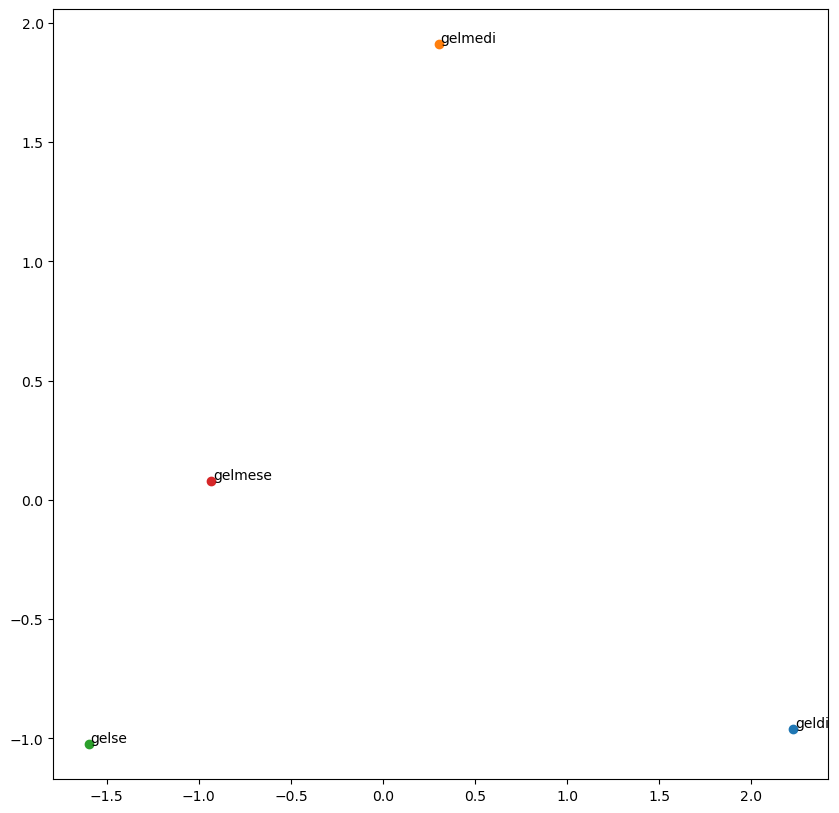

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kelimeler = ['geldi', 'gelmedi', 'gelse', 'gelmese']
vektörler = [fasttext_model.wv[word] for word in kelimeler]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vektörler)

plt.figure(figsize=(10, 10))
for i, kelime in enumerate(kelimeler):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, kelime)

plt.show()